In [80]:
import csv
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

from collections import Counter
import numpy as np
Kkma = Kkma()

import os
import re
import numpy as np
import pandas as pd
from math import log
import warnings
warnings.filterwarnings("ignore")

from konlpy.tag import Hannanum
hn = Hannanum()



In [157]:
#형태소 분석(UTF8),cp949, utf8
data1 = open('C:\\Users\\82109\\Documents\\카카오톡 받은 파일\\csv\\호모엠파티쿠스(고통받는인간).csv', 'r', encoding='cp949').read()


data1
data2 = Kkma.nouns(data1)
data3 = Counter(data2)

In [158]:
#불용어 제거
stop_words = open("C:\\Users\\82109\\Documents\\stopwords.txt", 'r', encoding='utf-8')
data3 = [each_word for each_word in data2 
            if each_word not in stop_words]

data3

data4 = []
for i in range(0, len(data3)) :
    if len(data3[i]) >= 2 | len(data3[i]) <= 10:
        data4.append(data3[i])

        


In [159]:
#단어별 빈도수 집계
data5 = Counter(data4)
data6 = data5.most_common(100)
tmp_data = dict(data6)



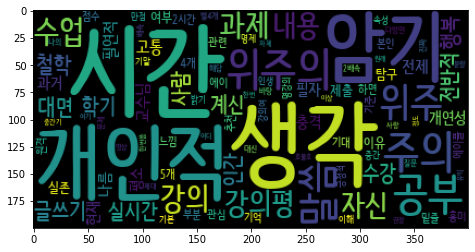

In [160]:
#워드 클라우드 그리기
wordcloud = WordCloud(font_path = 'C:\\Users\\82109\\NanumFontSetup_TTF_BARUNPEN\\NanumBarunpenB.ttf',
                      relative_scaling = 0.2,
                      background_color = 'black',
                     ).generate_from_frequencies(tmp_data)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()




In [1]:
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

path = 'C:\\Users\\82109\\NanumFontSetup_TTF_BARUNPEN\\NanumBarunpenB.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

font_location = 'C:\\Users\\82109\\NanumFontSetup_TTF_BARUNPEN\\NanumBarunpenB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

import nltk
plt.figure(figsize=(20,4))

from nltk.probability import FreqDist
g_data4=FreqDist(data4)

g_data4.plot(60)

ModuleNotFoundError: No module named 'nltk'

In [ ]:
import pandas as pd

df = pd.DataFrame()
df = pd.read_csv('C:\\Users\\82109\\Downloads\\판단과결정의심리학.csv')
print(df.head())
print(df.tail())

In [270]:
import re
import os
import numpy as np
import pandas as pd
from math import log
import warnings
warnings.filterwarnings("ignore")


os.getcwd()

os.chdir('C:\\Users\\82109\\Documents')


def cleancr(dic):
    line = []
    for i in range(len(dic)):
        line.append(re.sub("\s", "", dic[i]))
    return line


def matches(dic, d):
    return d.count(dic)


f = open("긍정텍스트.txt", 'r', encoding='UTF8')
positive = f.readlines()
f.close()
positive = cleancr(positive)



f = open("부정텍스트.txt", 'r', encoding='UTF8')
negative = f.readlines()
f.close()
negative = cleancr(negative)


docs = [ 
        ]

        
N = len(docs)

res = np.zeros(shape=(N, 2), dtype = np.uint16)
for i in range(N): 
    d = docs[i]
    cnt = 0
    for j in range(len(positive)):
        dic = positive[j]        
        cnt += matches(dic, d)
    res[i, 0] = cnt

for i in range(N): 
    d = docs[i]
    cnt = 0
    for j in range(len(negative)):
        dic = negative[j]        
        cnt += matches(dic, d)
    res[i, 1] = cnt


res






array([[2, 0]], dtype=uint16)

In [271]:
pos_rate = res[:, 0] / (res[:, 0] + res[:, 1])
pos_rate


array([1.])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

txt1 = '최고, 좋은, 좋아, 좋았, 편한, 편했, 재미, 재밌, 쉬운,쉬웠던, 추천하는, 명강의, 짱, 무난, 흥미로운, 흥미로웠, 유쾌, 최강'
txt2 = '생활 만큼 배포 과제 정말, 교수, 영화'
txt3 = '20년 2학기'

count = CountVectorizer()
docs = np.array([txt1, txt2, txt3])
bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())